In [1]:
import kagglehub
import re
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from IPython.display import SVG


model_path = kagglehub.model_download("google/gemma-2/transformers/gemma-2-2b-it")
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path,device_map="auto")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
def predict(descriptions: list) -> tuple:
    prompt = """Generate SVG code to visually represent detailed image from the following text description. CSS style elements are not allowed. Return the full SVG code."""
    svg_list = []
    svg_init = '<svg width="100" height="100" viewBox="0 0 100 100"><circle cx="50" cy="50" r="40" fill="red" /></svg>'
    for description in descriptions:
        formatted_description = f"<description>{description}</description>"
        inputs = tokenizer(prompt + formatted_description, return_tensors="pt")
        
        # Generate the output
        output = model.generate(**inputs, max_new_tokens=900)
        output_decoded = tokenizer.decode(output[0], skip_special_tokens=True)

        # Extract the SVG from the decoded output
        matches = re.findall(r"<svg.*?</svg>", output_decoded, re.DOTALL | re.IGNORECASE) 
        if matches:
            svg_code = matches[-1]
            svg_list.append(svg_code)
        else:
            svg_list.append(svg_init)
    return svg_list

In [3]:
import pandas as pd

# Read the CSV file
train = pd.read_csv('/kaggle/input/drawing-with-llms/train.csv')
train_list = train['description'].tolist()

In [4]:
pred1 = predict(train_list[1:3])

The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


In [5]:
pred1

['<svg width="200" height="100" viewBox="0 0 200 100">\n  <rect x="0" y="0" width="200" height="100" fill="black"/>\n  <rect x="0" y="0" width="20" height="100" fill="white"/>\n  <rect x="20" y="0" width="180" height="100" fill="black"/>\n  <rect x="20" y="0" width="20" height="100" fill="white"/>\n</svg>',
 '<svg width="500" height="500" viewBox="0 0 500 500" xmlns="http://www.w3.org/2000/svg">\n  <rect x="100" y="100" width="300" height="300" fill="crimson" />\n  <rect x="200" y="200" width="100" height="100" fill="crimson" />\n  <rect x="300" y="300" width="100" height="100" fill="crimson" />\n  <rect x="400" y="400" width="100" height="100" fill="crimson" />\n  <rect x="100" y="400" width="100" height="100" fill="crimson" />\n  <rect x="200" y="300" width="100" height="100" fill="crimson" />\n  <rect x="300" y="200" width="100" height="100" fill="crimson" />\n  <rect x="400" y="100" width="100" height="100" fill="crimson" />\n</svg>']

<svg width="200" height="100" viewBox="0 0 200 100">
  <rect x="0" y="0" width="200" height="100" fill="black"/>
  <rect x="0" y="0" width="20" height="100" fill="white"/>
  <rect x="20" y="0" width="180" height="100" fill="black"/>
  <rect x="20" y="0" width="20" height="100" fill="white"/>
</svg>


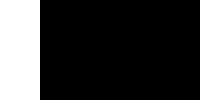

<svg width="500" height="500" viewBox="0 0 500 500" xmlns="http://www.w3.org/2000/svg">
  <rect x="100" y="100" width="300" height="300" fill="crimson" />
  <rect x="200" y="200" width="100" height="100" fill="crimson" />
  <rect x="300" y="300" width="100" height="100" fill="crimson" />
  <rect x="400" y="400" width="100" height="100" fill="crimson" />
  <rect x="100" y="400" width="100" height="100" fill="crimson" />
  <rect x="200" y="300" width="100" height="100" fill="crimson" />
  <rect x="300" y="200" width="100" height="100" fill="crimson" />
  <rect x="400" y="100" width="100" height="100" fill="crimson" />
</svg>


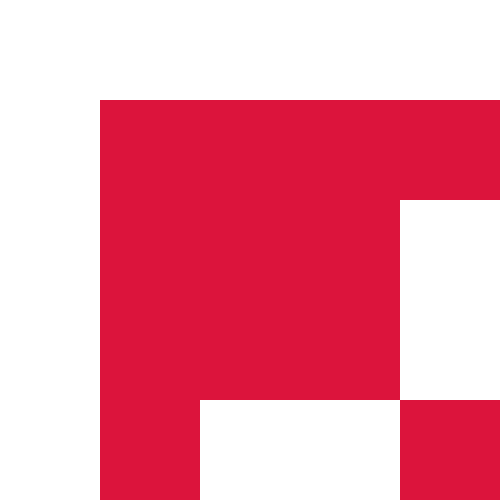

In [6]:
for svg_code in pred1:
    print(svg_code)
    display(SVG(svg_code))